<a href="https://www.kaggle.com/code/piyushjain572/multivariate-analysis?scriptVersionId=198863963" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df_ = pd.read_csv('/kaggle/input/modified-titanic-dataset/train.csv')
df_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Numerical - Numerical

## a. ScatterPlot

<Axes: xlabel='Age', ylabel='Fare'>

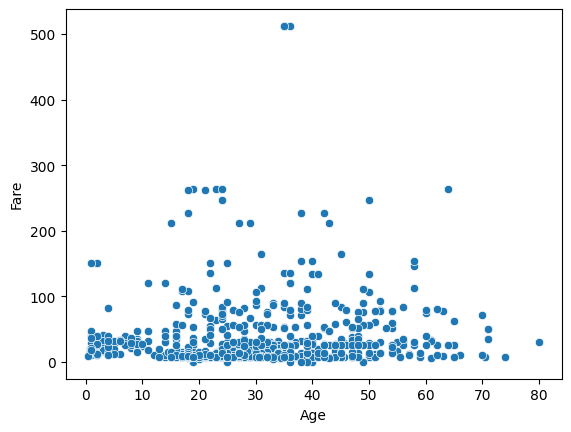

In [61]:
sns.scatterplot(data=df_,x=df_['Age'].dropna(),y='Fare')

<Axes: xlabel='Age', ylabel='Fare'>

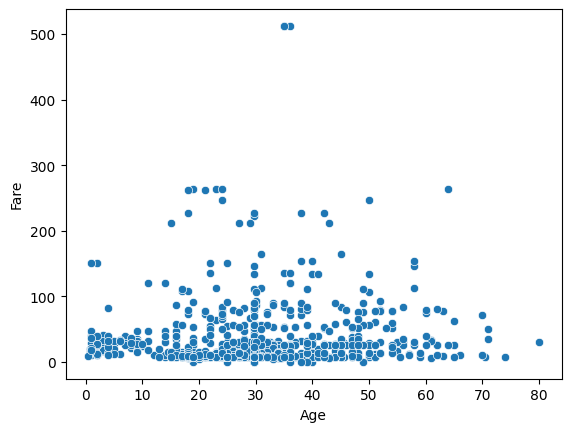

In [62]:
sns.scatterplot(data=df_,x=df_['Age'].fillna(df_['Age'].mean()),y='Fare')

## b.PairPlot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

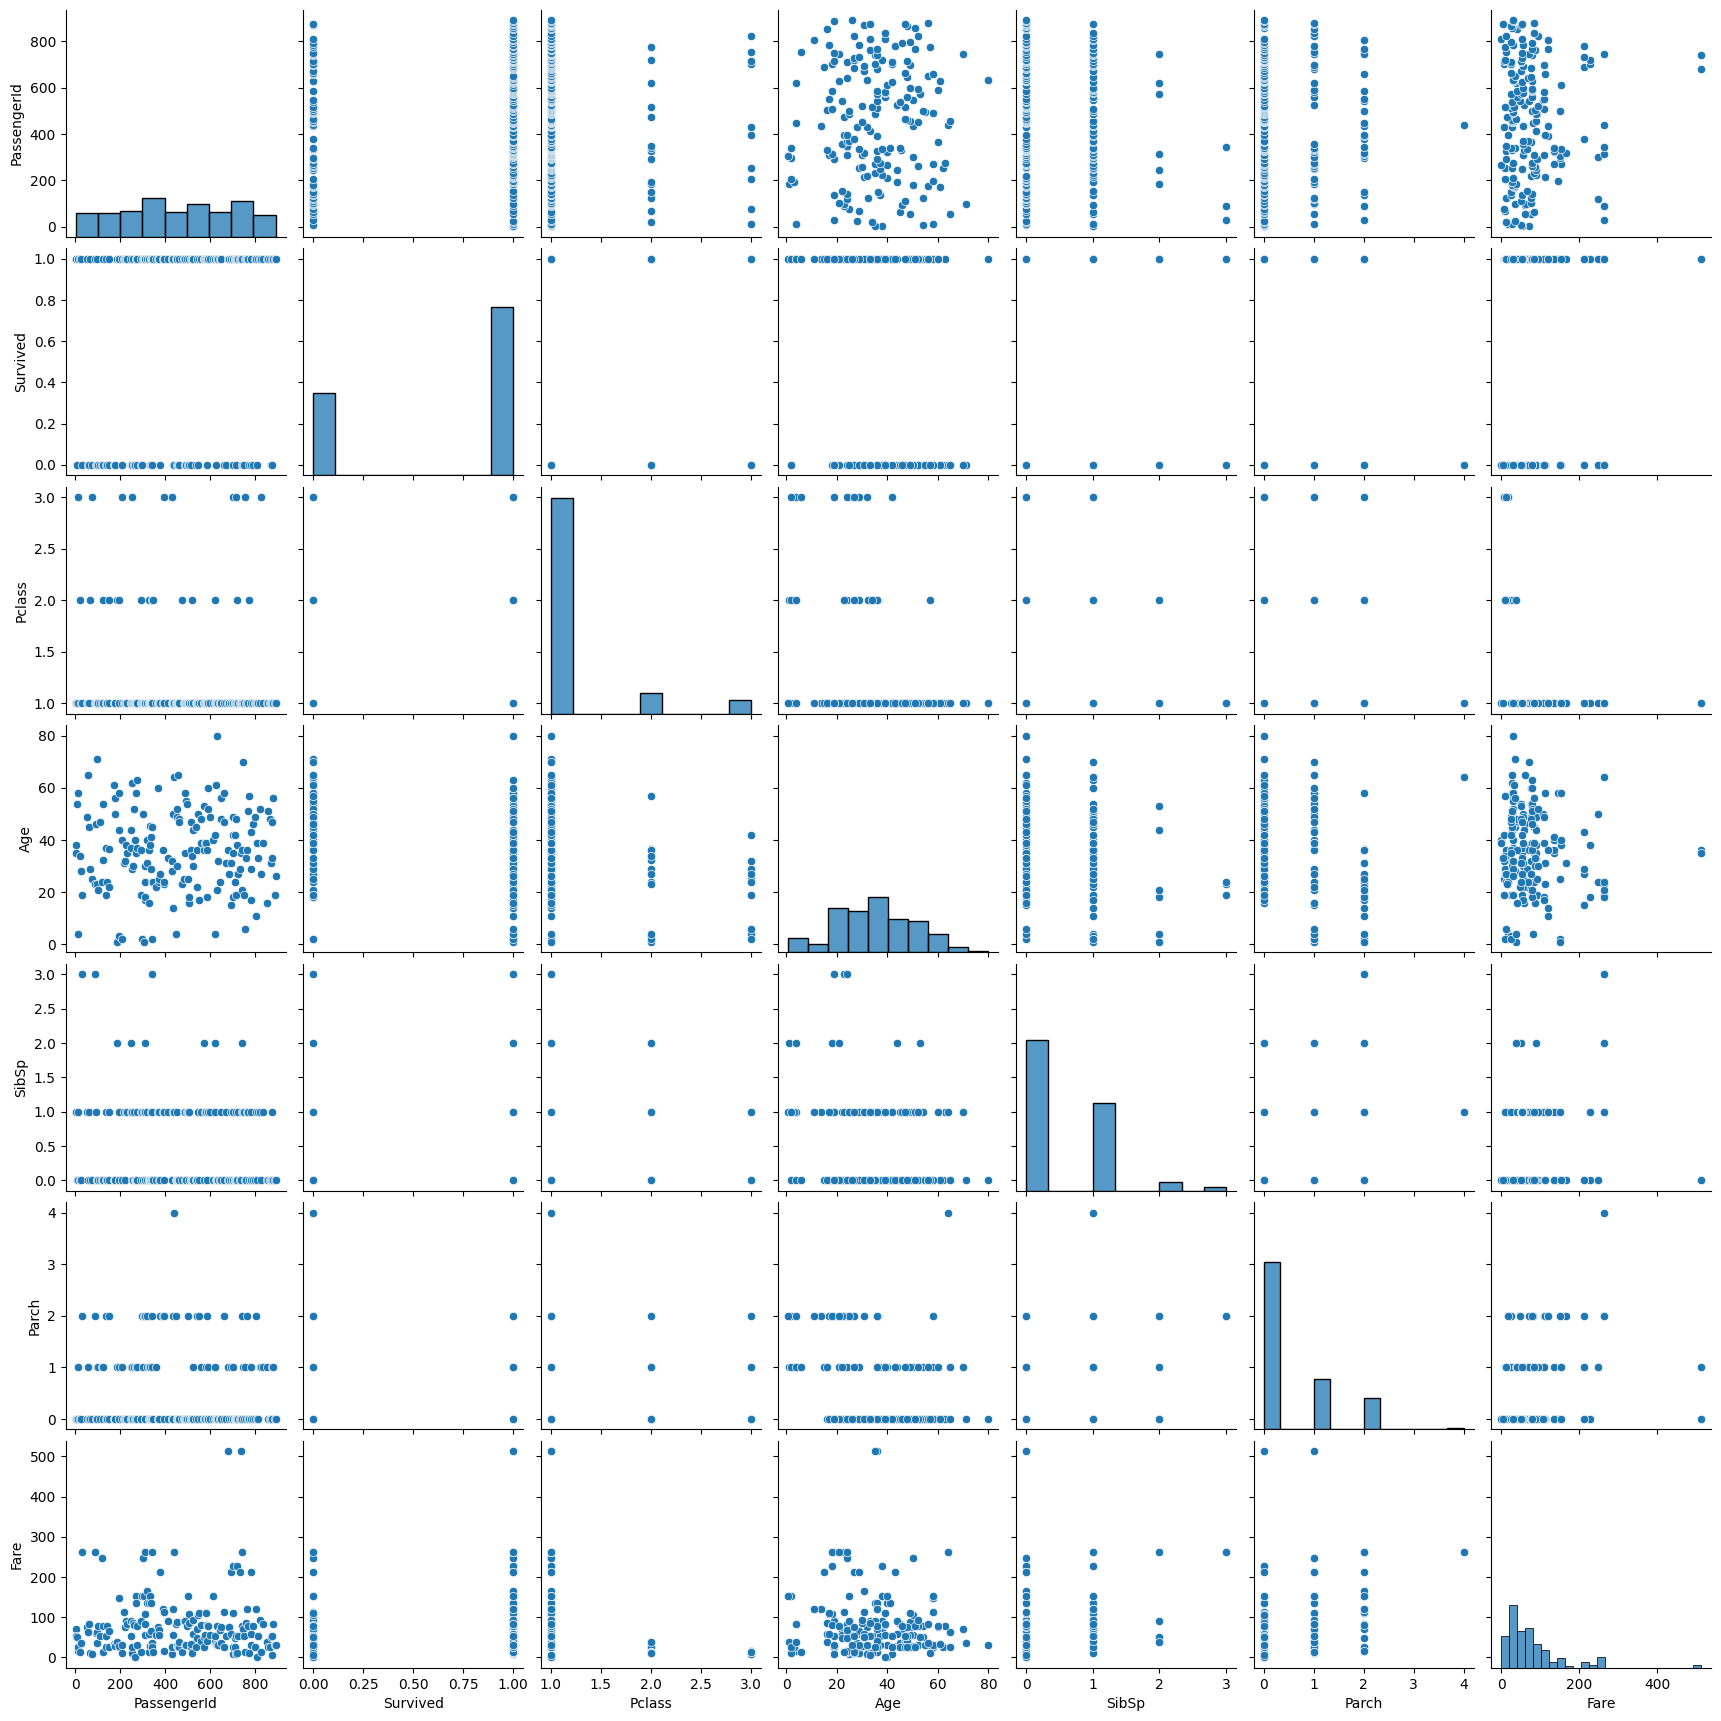

In [63]:
sns.pairplot(data=df_.dropna())

<Axes: >

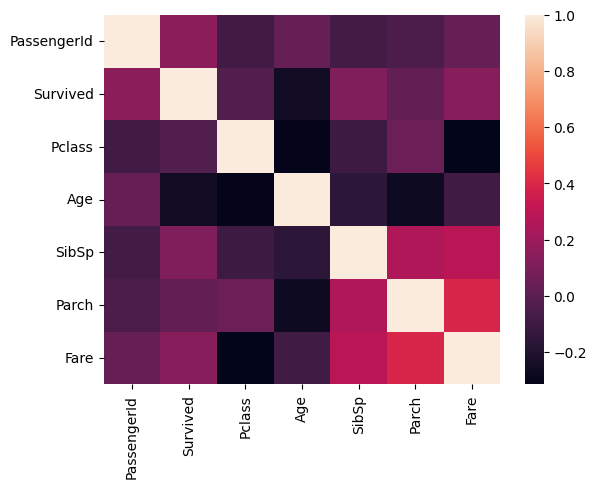

In [64]:
sns.heatmap(df_.dropna().corr(numeric_only=True))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Pclass', ylabel='Fare'>

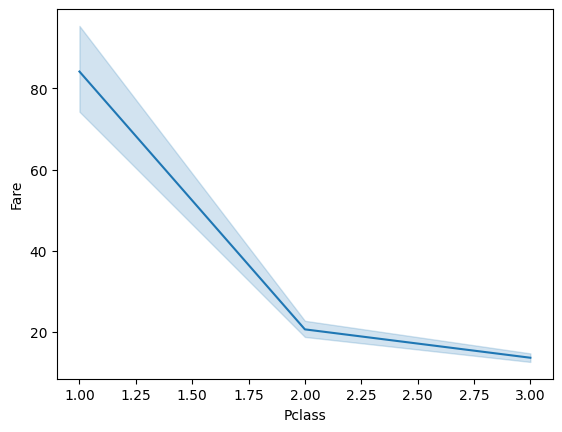

In [65]:
sns.lineplot(data=df_,y='Fare',x='Pclass')

# 2. Categorical - Categorical

## a. CrossTables

In [66]:
pd.crosstab(index=df_.Sex,columns=df_.Embarked,margins=True)

Embarked,C,Q,S,All
Sex,,,,
female,73,36,203,312
male,95,41,441,577
All,168,77,644,889


## b. ClusterMap

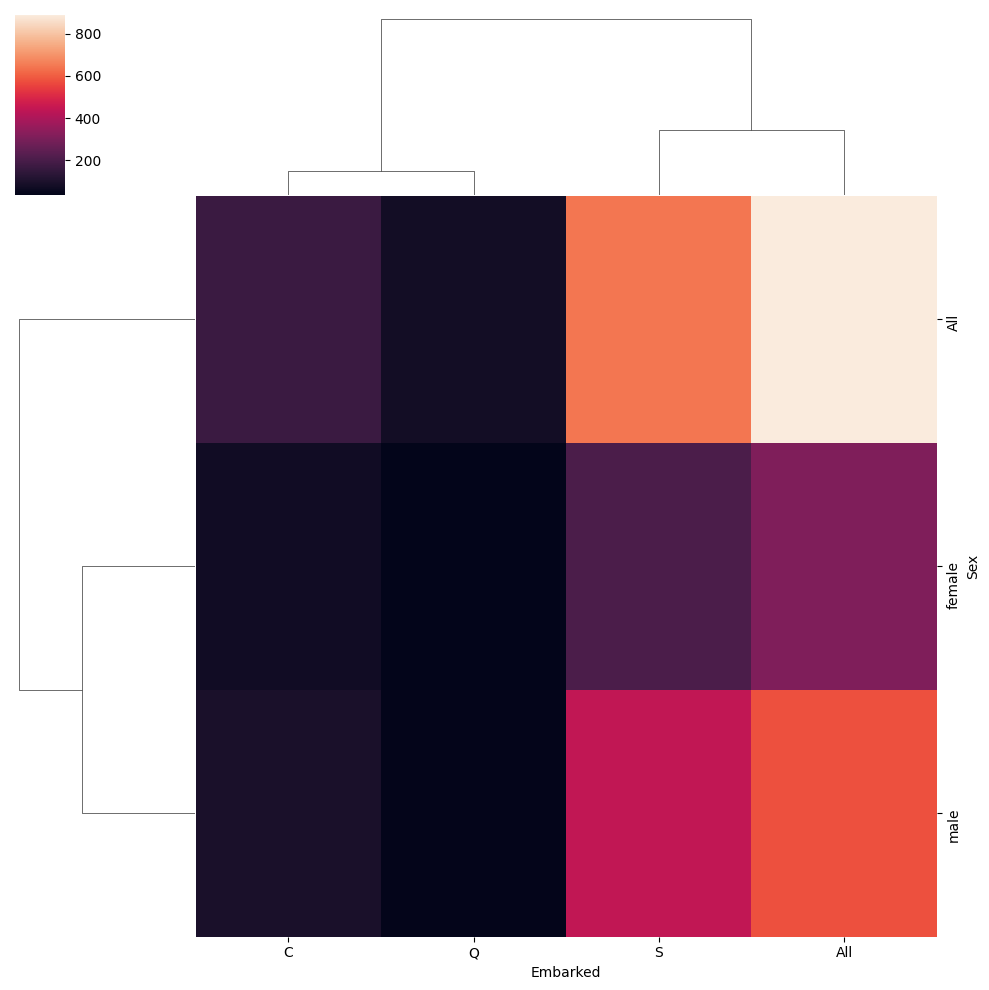

In [67]:
sns.clustermap(pd.crosstab(index=df_.Sex,columns=df_.Embarked,margins=True))

## c. GroupBy BarChart

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

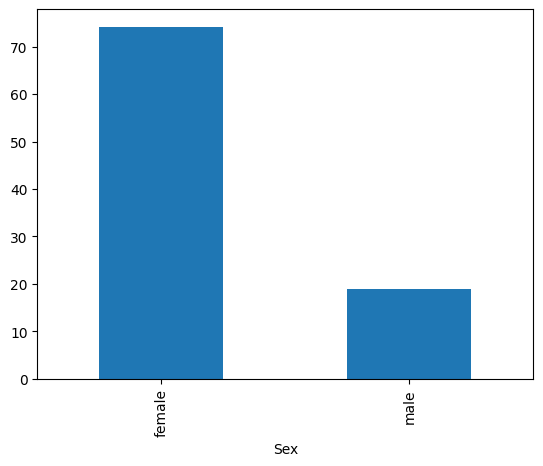

In [68]:
# df = df_.drop(df_.columns[[0,3,8,10]],axis=1)
# print(df.head())
(df.groupby('Sex').mean(numeric_only=True)['Survived']*100).plot(kind='bar')
df.groupby('Sex').mean(numeric_only=True)['Survived']*100

# 3. Numerical - Categorical

## a. BarPlot

<Axes: xlabel='Sex', ylabel='Fare'>

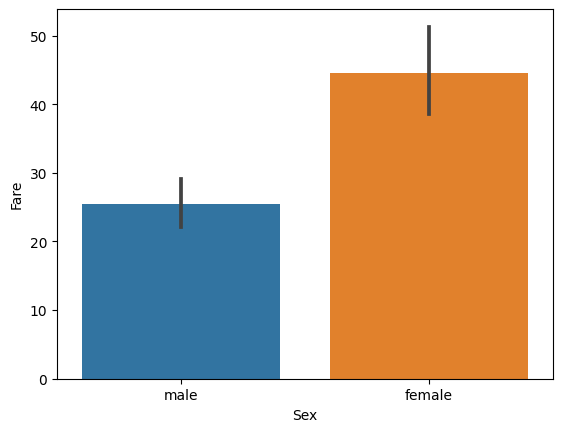

In [69]:
sns.barplot(data=df_,x='Sex',y='Fare')

<Axes: xlabel='Pclass', ylabel='Fare'>

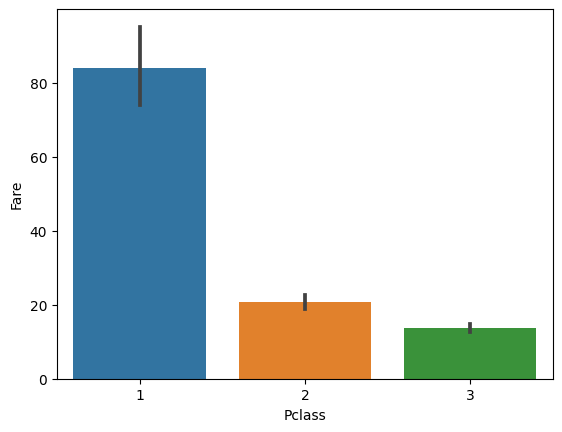

In [70]:
sns.barplot(data=df_,x='Pclass',y='Fare')

## b. BoxPlot

<Axes: xlabel='Embarked', ylabel='Fare'>

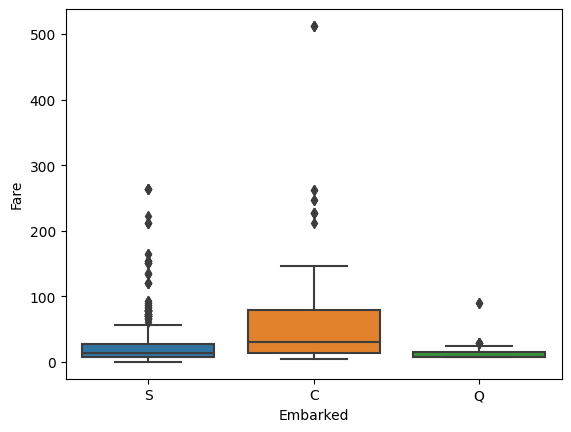

In [71]:
sns.boxplot(data=df_,x='Embarked',y='Fare')

## c. Displot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


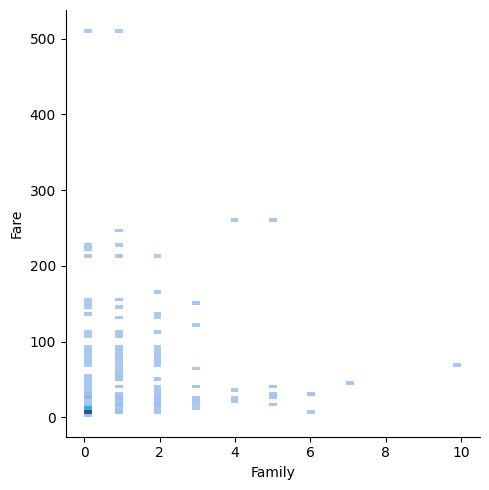

In [72]:
df_['Family'] = df_['SibSp'] + df_['Parch']
sns.displot(data=df_,x='Family',y='Fare')

# Now to understand deeper, for more than 2 params, we have parameters in seaborn library called ['hue','size','style'] which we can use for further analysis.